In [24]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
import math
from datetime import datetime
matplotlib.rc('font',family='AppleGothic')
# 한글 폰트가 깨지는 것을 방지하기 위한 설정 및 라이브러리 선언

In [5]:
# 선처리 된 엑셀 파일 읽어오기
tashu_2013_1 = pd.read_excel('tashu_rental_2013_1.xlsx',sheetname="tashu_rental info_2013" ,encoding = 'cp-949')
tashu_2013_2 = pd.read_excel('tashu_rental_2013_2.xlsx',sheetname="tashu_rental info_2013" ,encoding = 'cp-949')
tashu_2014_1 = pd.read_excel('tashu_rental_2014_1.xlsx',sheetname="rental_info_2014_1" ,encoding = 'cp-949')
tashu_2014_2 = pd.read_excel('tashu_rental_2014_2.xlsx',sheetname="rental_info_2014_2" ,encoding = 'cp-949')

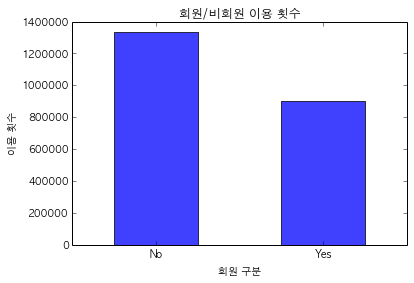

In [54]:
# 회원 비회원 구분
# NO는 비회원
# YES는 회원
member_count =  tashu_2013_1.groupby('IS_MEMBER').size() \
    + tashu_2013_2.groupby('IS_MEMBER').size() \
    + tashu_2014_1.groupby('IS_MEMBER').size() \
    + tashu_2014_2.groupby('IS_MEMBER').size()
    
plot = member_count.plot(kind = 'bar', alpha = 0.75, title = u'회원/비회원 이용 횟수', rot = 0)
plot.set_xlabel(u'회원 구분')
plot.set_ylabel(u'이용 횟수')

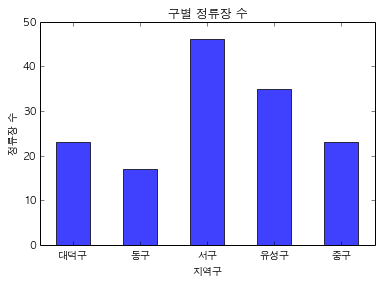

In [7]:
# 지역구별 정류장 수
station_info = pd.read_csv('201503_station_info.csv', encoding = 'cp949')
station_count = station_info.groupby(u'구별').size()
plot = station_count.plot(kind ='bar',alpha=0.75, title = u'구별 정류장 수',rot=0)
plot.set_ylabel(u'정류장 수')
plot.set_xlabel(u'지역구')

In [ ]:
# 인기있는 코스
# SELECT COUNT(*) 
#        FROM TASHU_LOG
#        GROUP BY 
#        TASHU_LOG.RENT_STATION AND RETURN_STATION
#        ORDER BY DESC
popular_course =  tashu_2013_1.groupby(['RENT_STATION', 'RETURN_STATION']).size() \
                    + tashu_2013_2.groupby(['RENT_STATION', 'RETURN_STATION']).size() \
                    + tashu_2014_2.groupby(['RENT_STATION', 'RETURN_STATION']).size() \
                    + tashu_2014_1.groupby(['RENT_STATION', 'RETURN_STATION']).size()
popular_course =  popular_course.sort_values(ascending= False)
print popular_course[:10]

In [45]:
# 인기있는 정류장
# SELECT COUNT(*) 
#        FROM TASHU_LOG
#        GROUP BY 
#        TASHU_LOG.RENT_STATION
#        ORDER BY DESC
top10_station =  tashu_2013_1.groupby('RENT_STATION').size() \
                    + tashu_2013_2.groupby('RENT_STATION').size() \
                    + tashu_2014_2.groupby('RENT_STATION').size() \
                    + tashu_2014_1.groupby('RENT_STATION').size()
top10_station =  top10_station.sort_values(ascending= False)
print top10_station[:10]

RENT_STATION
3      117108
56      65861
31      58090
17      57874
32      51328
33      50083
14      40374
21      38817
55      38383
30      37886
105     36770
60      36563
8       36484
1       34891
46      34647
19      34423
108     32260
12      31842
18      31451
22      29631
4       27964
10      27464
dtype: float64
